In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

In [2]:
train = np.loadtxt('wine_training.csv', delimiter=',')
test = np.loadtxt('wine_test.csv', delimiter=',')
new_batch = np.loadtxt('wine_new_batch.csv', delimiter=',')

In [3]:
scaler = preprocessing.StandardScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

X_train, Y_train = train_scaled[:, :-1], train_scaled[:, -1]
X_test, Y_test = test_scaled[:, :-1], test_scaled[:, -1]

# Base setting model

## Linear regression

In [60]:
lin = LinearRegression().fit(X_train, Y_train)

lin_train_predict = lin.predict(X_train)
lin_test_predict = lin.predict(X_test)

lin_train_mse = mean_squared_error(Y_train, lin_train_predict)
lin_test_mse = mean_squared_error(Y_test, lin_test_predict)

print(lin_train_mse, lin_test_mse)

0.6278484956554817 0.7471696905187133


## Gaussian (RBF) kernel

In [61]:
krr_rbf = KernelRidge(kernel='rbf').fit(X_train, Y_train)

krr_rbf_train_predict = krr_rbf.predict(X_train)
krr_rbf_test_predict = krr_rbf.predict(X_test)

krr_rbf_train_mse = mean_squared_error(Y_train, krr_rbf_train_predict)
krr_rbf_test_mse = mean_squared_error(Y_test, krr_rbf_test_predict)

print(krr_rbf_train_mse, krr_rbf_test_mse)

0.4474673899912707 0.6665992233666976


## Laplacian kernel

In [62]:
krr_laplacian = KernelRidge(kernel='laplacian').fit(X_train, Y_train)

krr_laplacian_train_predict = krr_laplacian.predict(X_train)
krr_laplacian_test_predict = krr_laplacian.predict(X_test)

krr_laplacian_train_mse = mean_squared_error(Y_train, krr_laplacian_train_predict)
krr_laplacian_test_mse = mean_squared_error(Y_test, krr_laplacian_test_predict)

print(krr_laplacian_train_mse, krr_laplacian_test_mse)

0.3586005082612414 0.6479752488240716


# Hyperparameter Tuning

## Gaussian (RBF) kernel

In [8]:
lambdas = 2**np.linspace(-10, 10, 21)
sigmas = 2**np.linspace(-10, 10, 21)

gammas = 1/(2*sigmas**2)

cv_rbf = GridSearchCV(KernelRidge(kernel='rbf'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                      scoring='neg_mean_squared_error', cv=10)
cv_rbf.fit(X_train, Y_train)
print(cv_rbf.best_params_)

print('best_lambda', cv_rbf.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_rbf.best_params_['gamma']][0])
print(np.log2(cv_rbf.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_rbf.best_params_['gamma']][0]))

{'alpha': 0.125, 'gamma': 0.03125}
best_lambda 0.125
best_sigma 4.0
-3.0
2.0


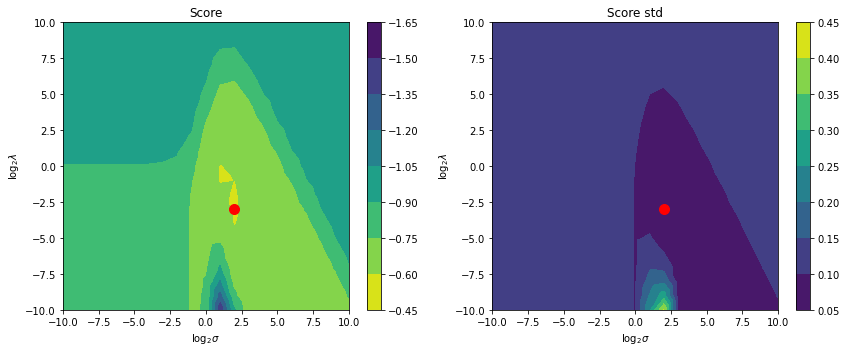

In [9]:
scores = cv_rbf.cv_results_['mean_test_score']
scores_std = cv_rbf.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / np.sqrt(2*cv_rbf.cv_results_['param_gamma'].data.astype(np.float64)))
log_2_lambda = np.log2(cv_rbf.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / np.sqrt(2*cv_rbf.best_params_['gamma']))
alpha_center = np.log2(cv_rbf.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [10]:
lambdas = 2**np.linspace(-4, -2, 21)
sigmas = 2**np.linspace(1, 3, 21)

gammas = 1/(2*sigmas**2)

cv_rbf = GridSearchCV(KernelRidge(kernel='rbf'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                      scoring='neg_mean_squared_error', cv=10)
cv_rbf.fit(X_train, Y_train)
print(cv_rbf.best_params_)

print('best_lambda', cv_rbf.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_rbf.best_params_['gamma']][0])
print(np.log2(cv_rbf.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_rbf.best_params_['gamma']][0]))

{'alpha': 0.1538930516681145, 'gamma': 0.03125}
best_lambda 0.1538930516681145
best_sigma 4.0
-2.7
2.0


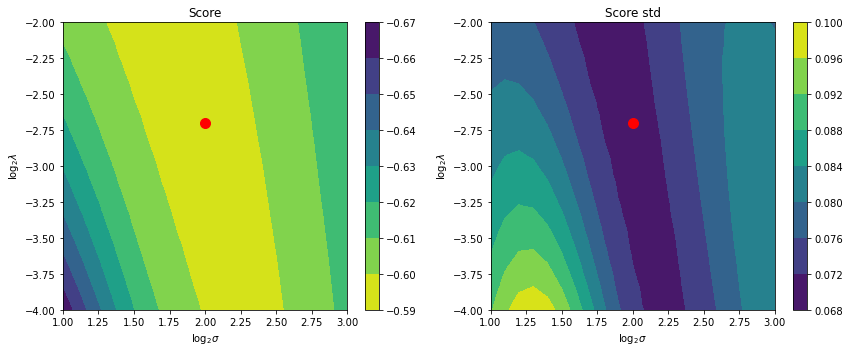

In [11]:
scores = cv_rbf.cv_results_['mean_test_score']
scores_std = cv_rbf.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / np.sqrt(2*cv_rbf.cv_results_['param_gamma'].data.astype(np.float64)))
log_2_lambda = np.log2(cv_rbf.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / np.sqrt(2*cv_rbf.best_params_['gamma']))
alpha_center = np.log2(cv_rbf.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [54]:
lambdas = 2**np.linspace(-3, -2.5, 21)
sigmas = 2**np.linspace(1.75, 2.25, 21)

gammas = 1/(2*sigmas**2)

cv_rbf = GridSearchCV(KernelRidge(kernel='rbf'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                      scoring='neg_mean_squared_error', cv=10)
cv_rbf.fit(X_train, Y_train)
print(cv_rbf.best_params_)

print('best_lambda', cv_rbf.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_rbf.best_params_['gamma']][0])

{'alpha': 0.14865088937534013, 'gamma': 0.03125}
best_lambda 0.14865088937534013
best_sigma 4.0


In [13]:
print(np.log2(cv_rbf.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_rbf.best_params_['gamma']][0]))

-2.75
2.0


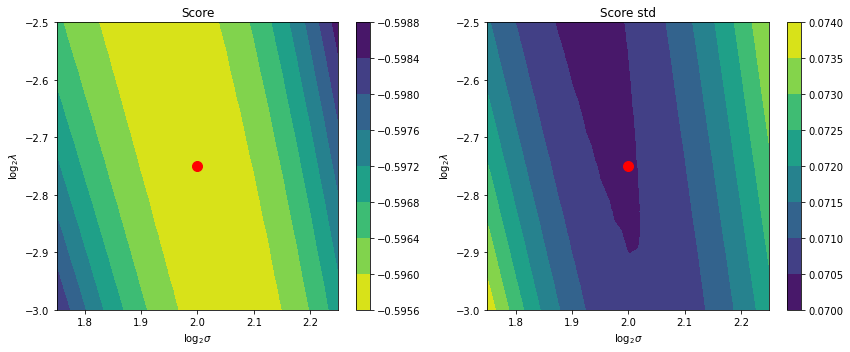

In [14]:
scores = cv_rbf.cv_results_['mean_test_score']
scores_std = cv_rbf.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / np.sqrt(2*cv_rbf.cv_results_['param_gamma'].data.astype(np.float64)))
log_2_lambda = np.log2(cv_rbf.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / np.sqrt(2*cv_rbf.best_params_['gamma']))
alpha_center = np.log2(cv_rbf.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

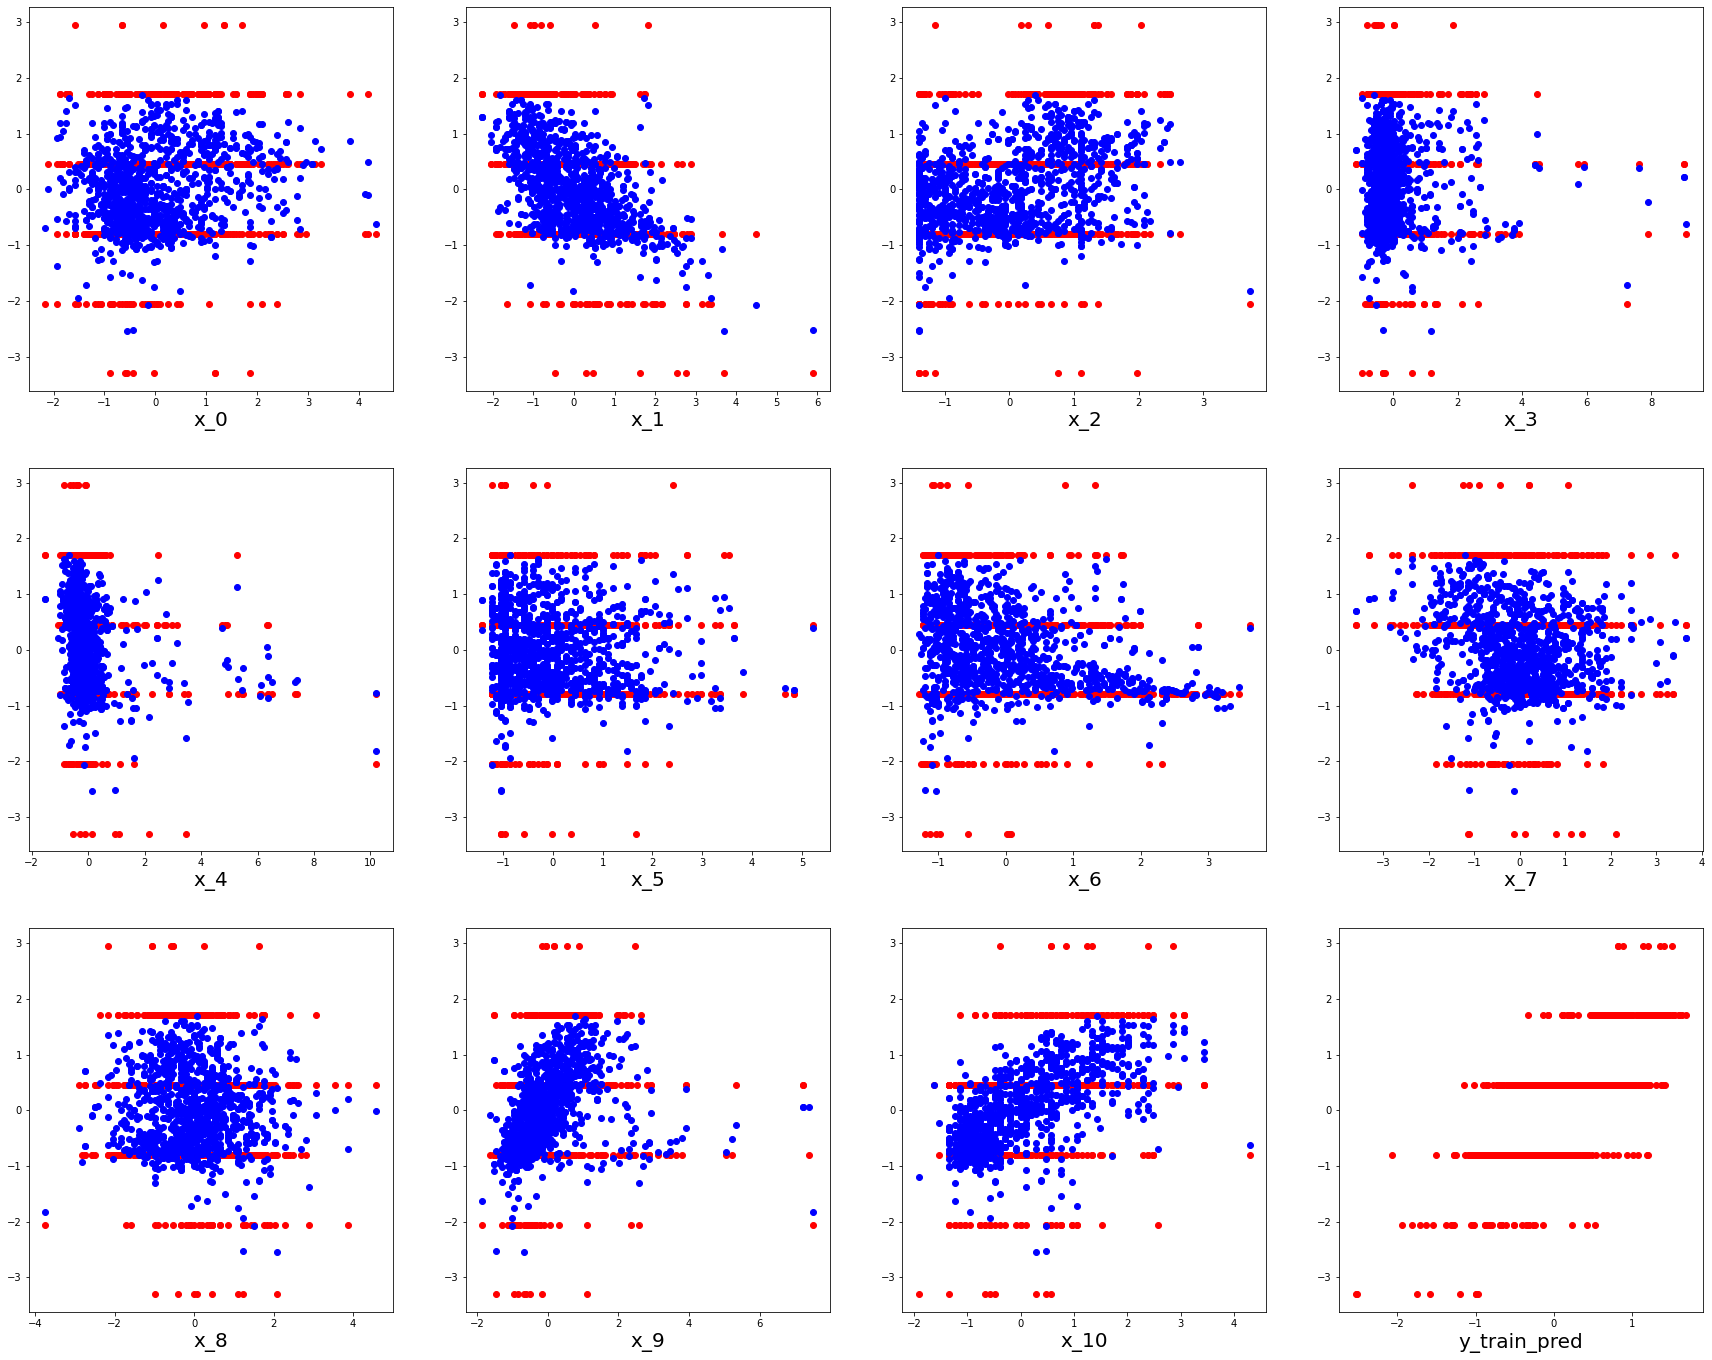

In [24]:
Y_train_pred = cv_rbf.predict(X_train)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter(Y_train_pred, Y_train, color='r')
            ax[j][i].set_xlabel('y_train_pred', fontsize=20)
            break
        ax[j][i].scatter(X_train[:, i+j*4], Y_train, color='r', label='Train')
        ax[j][i].scatter(X_train[:, i+j*4], Y_train_pred, color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

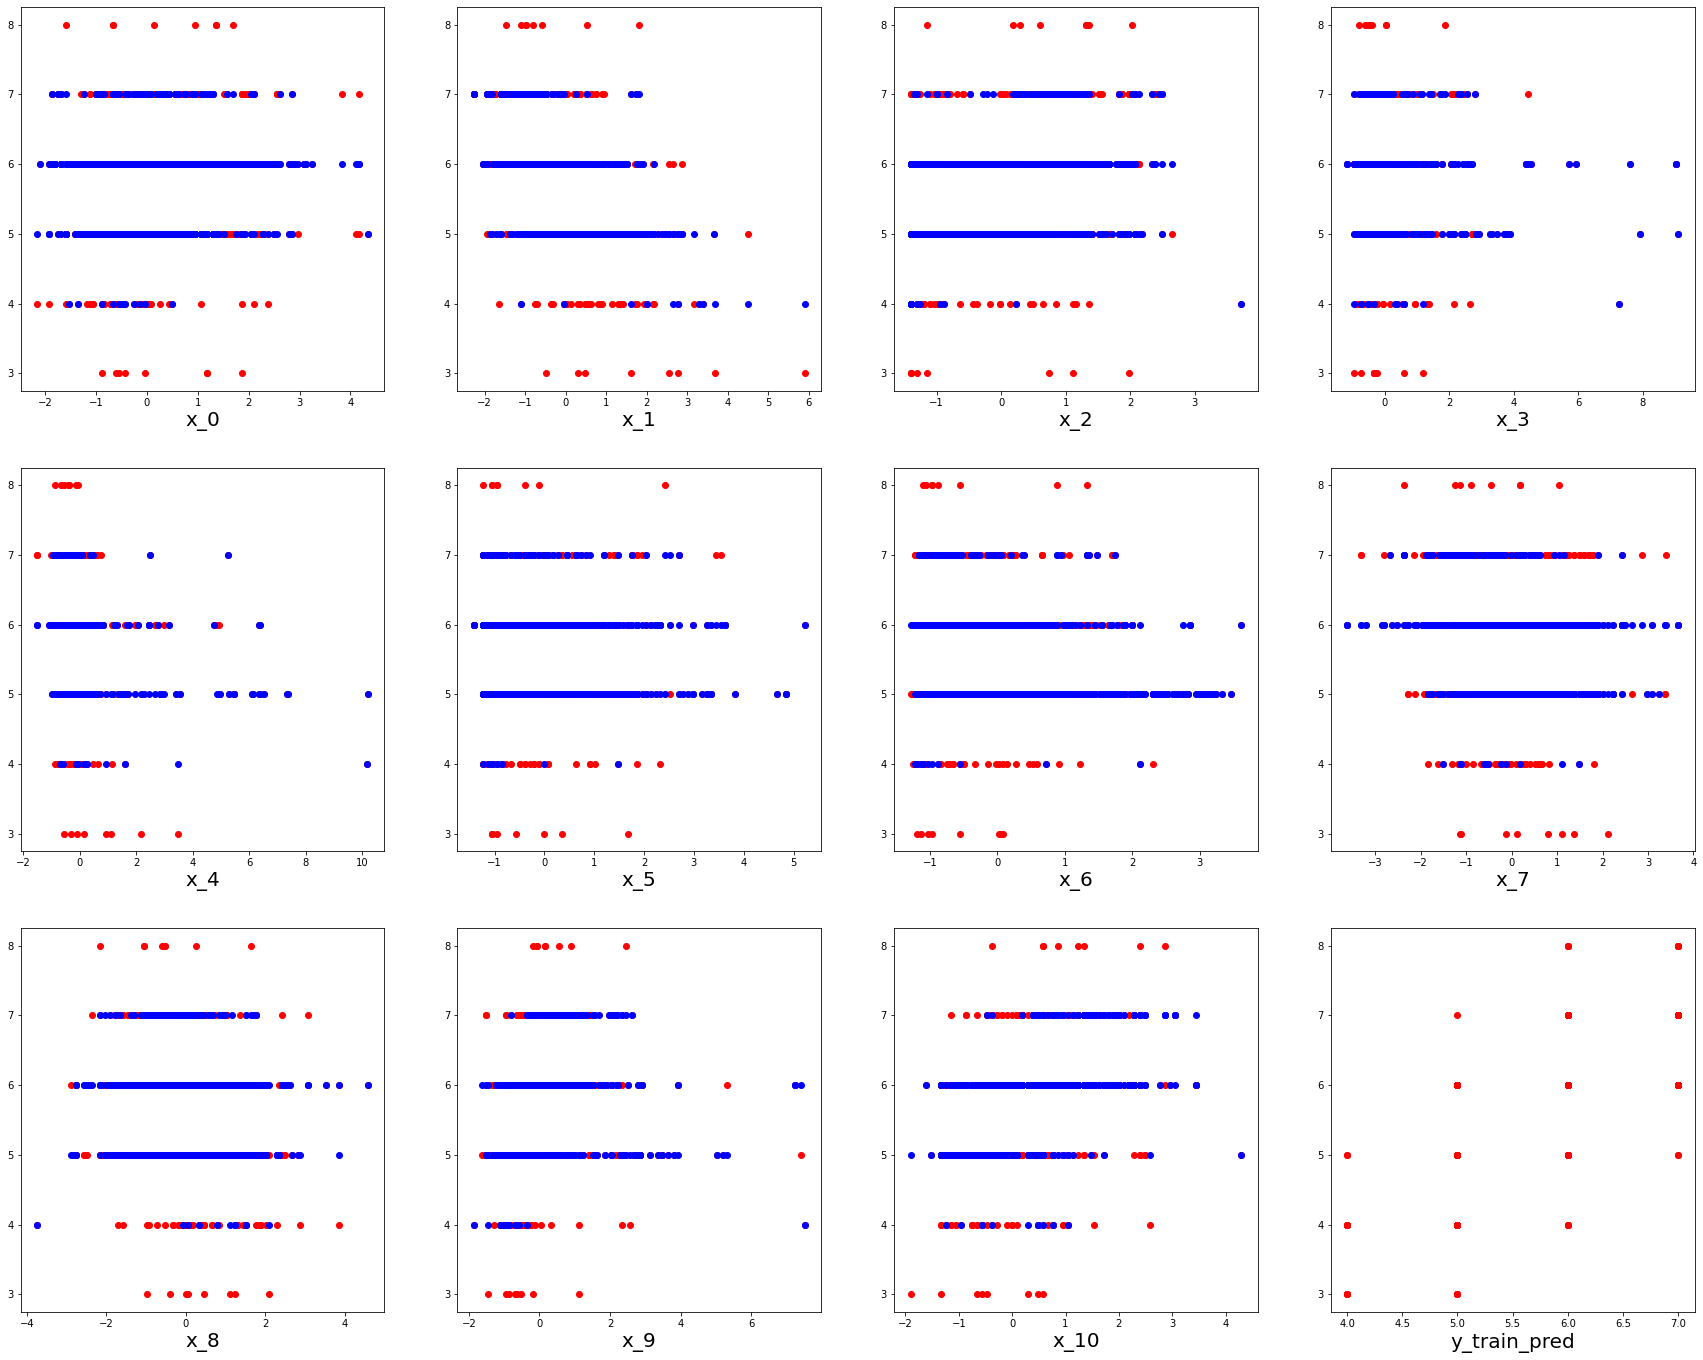

In [26]:
Y_train_pred = cv_rbf.predict(X_train)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter((Y_train_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), 
                              Y_train*scaler.scale_[-1] + scaler.mean_[-1], color='r')
            ax[j][i].set_xlabel('y_train_pred', fontsize=20)
            break
        ax[j][i].scatter(X_train[:, i+j*4], Y_train*scaler.scale_[-1] + scaler.mean_[-1], color='r', label='Train')
        ax[j][i].scatter(X_train[:, i+j*4], (Y_train_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

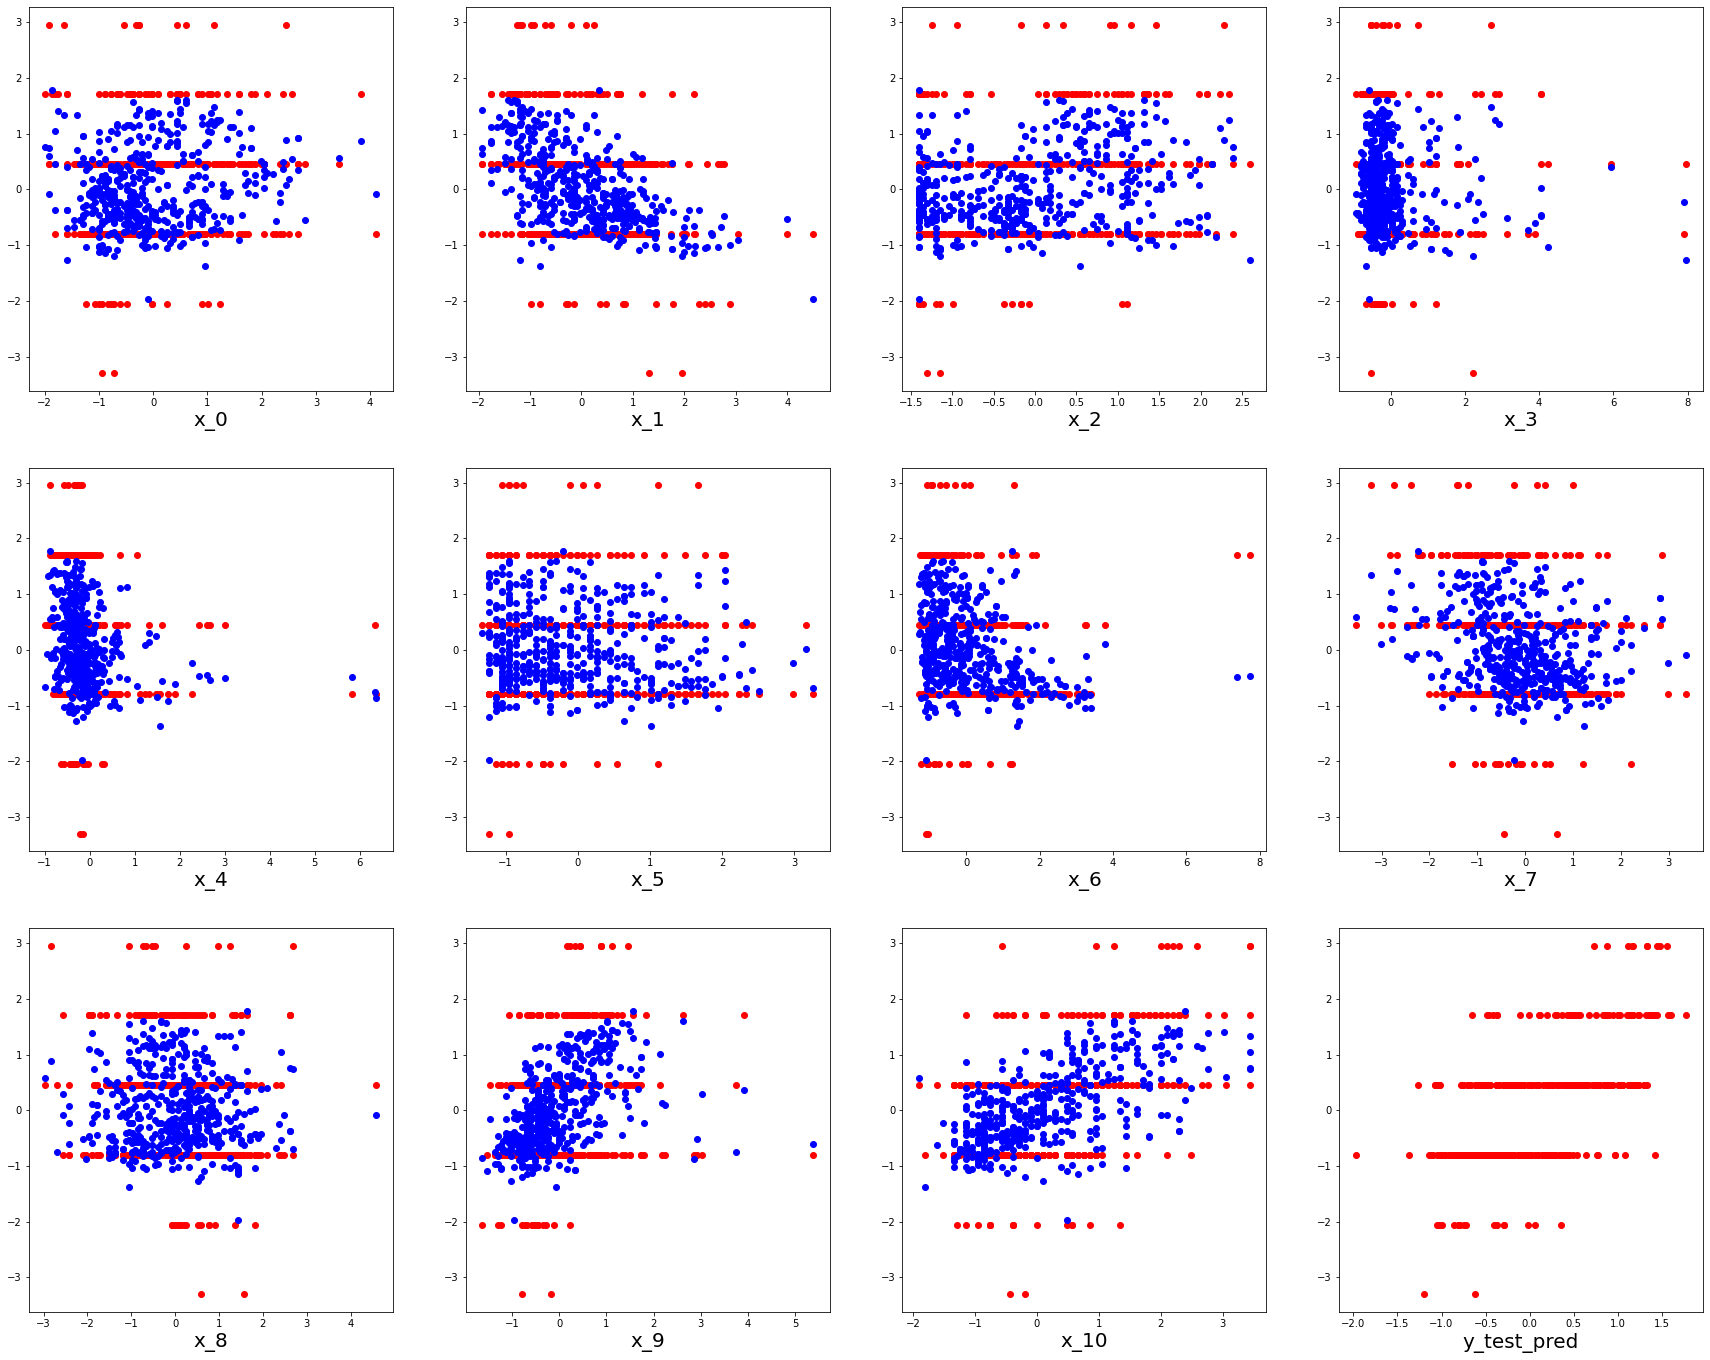

In [23]:
Y_test_pred = cv_rbf.predict(X_test)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter(Y_test_pred, Y_test, color='r')
            ax[j][i].set_xlabel('y_test_pred', fontsize=20)
            break
        ax[j][i].scatter(X_test[:, i+j*4], Y_test, color='r', label='Test')
        ax[j][i].scatter(X_test[:, i+j*4], Y_test_pred, color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

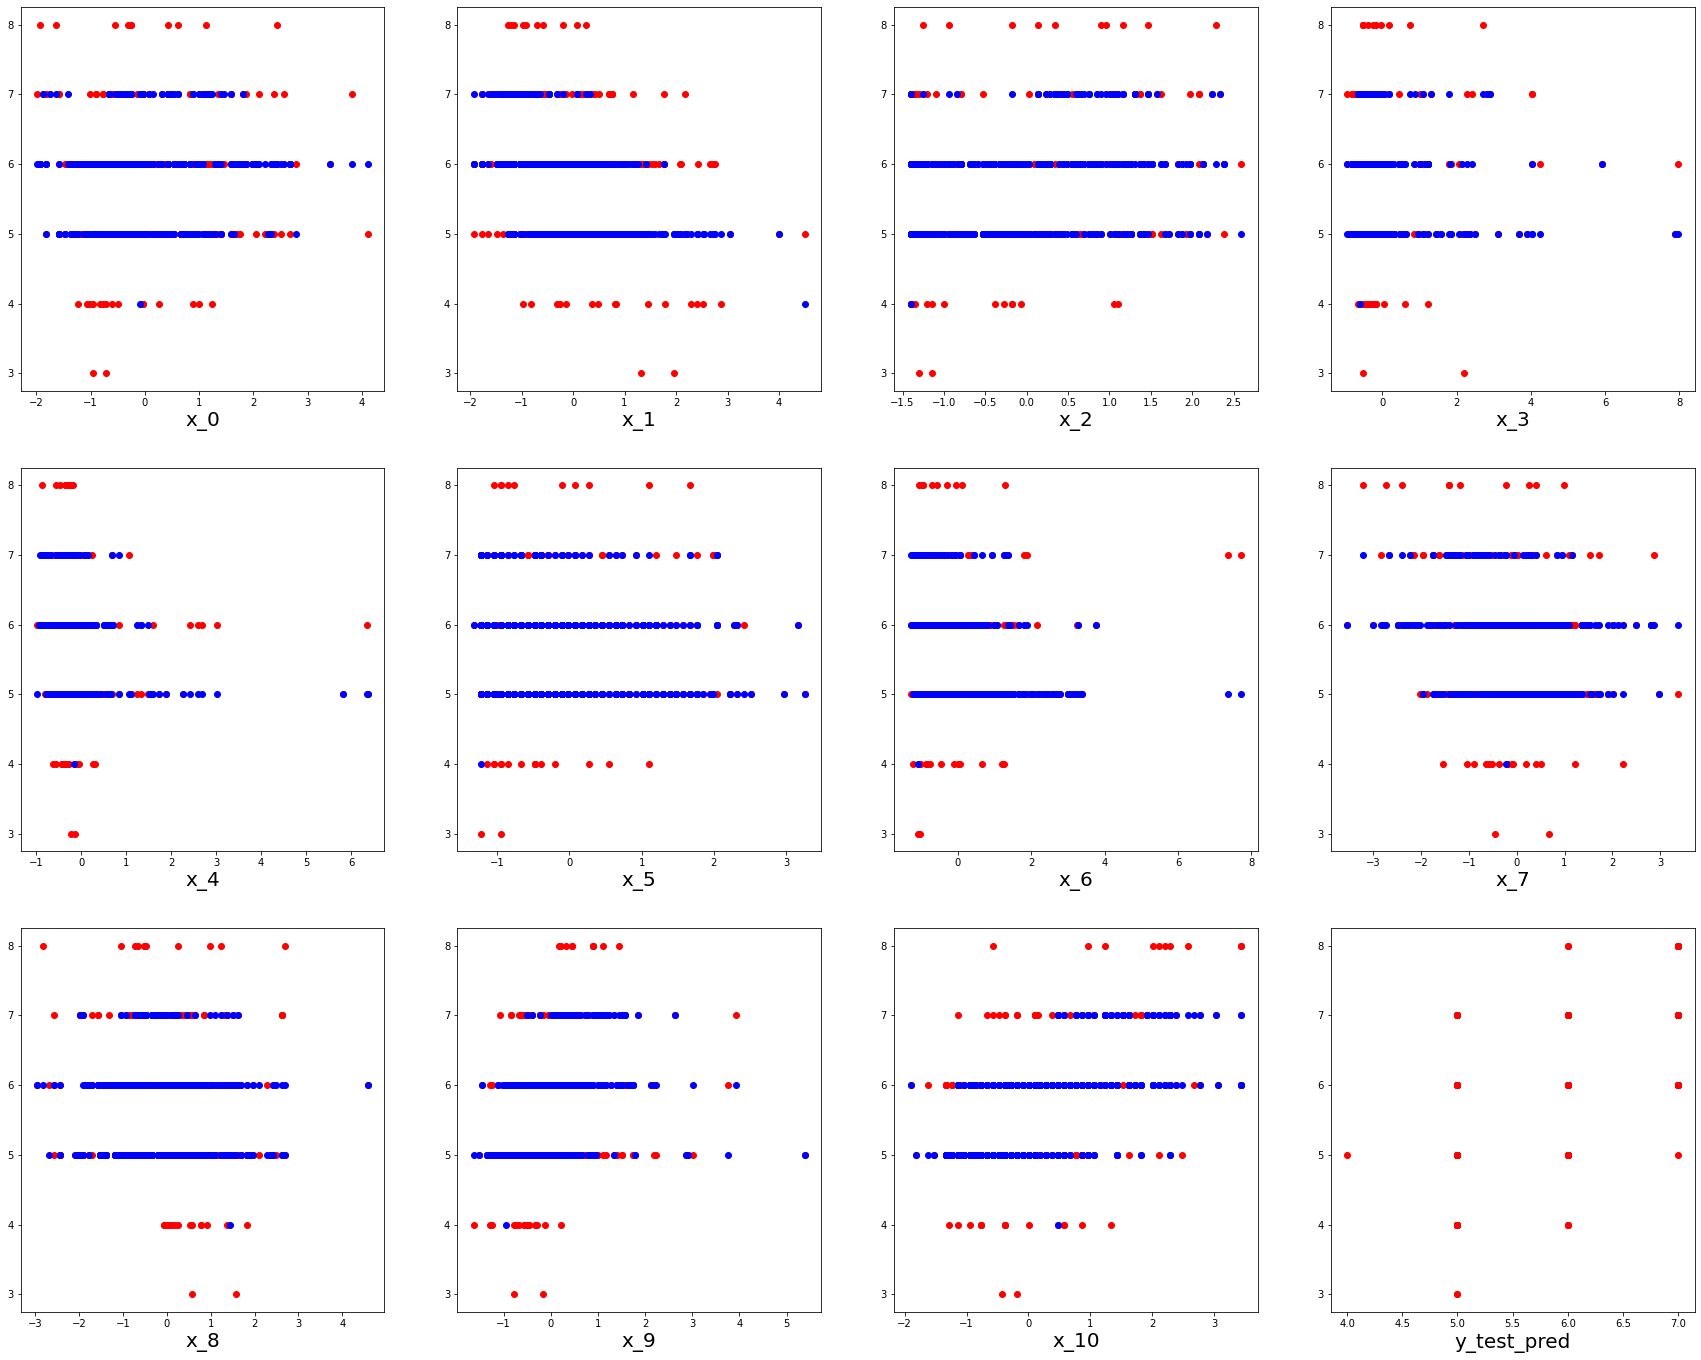

In [28]:
Y_test_pred = cv_rbf.predict(X_test)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter((Y_test_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), 
                              Y_test*scaler.scale_[-1] + scaler.mean_[-1], color='r')
            ax[j][i].set_xlabel('y_test_pred', fontsize=20)
            break
        ax[j][i].scatter(X_test[:, i+j*4], Y_test*scaler.scale_[-1] + scaler.mean_[-1], color='r', label='Test')
        ax[j][i].scatter(X_test[:, i+j*4], (Y_test_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

In [29]:
rbf_train_mse = mean_squared_error(Y_train, Y_train_pred)
rbf_test_mse = mean_squared_error(Y_test, Y_test_pred)

print(rbf_train_mse, rbf_test_mse)

0.4578972706981647 0.6836021880811453


## Laplacian kernel

In [30]:
lambdas = 2**np.linspace(-10, 10, 21)
sigmas = 2**np.linspace(-10, 10, 21)

gammas = 1/sigmas

cv_laplacian = GridSearchCV(KernelRidge(kernel='laplacian'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                            scoring='neg_mean_squared_error', cv=10)
cv_laplacian.fit(X_train, Y_train)
print(cv_laplacian.best_params_)

print('best_lambda', cv_laplacian.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_laplacian.best_params_['gamma']][0])
print(np.log2(cv_laplacian.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_laplacian.best_params_['gamma']][0]))

{'alpha': 0.25, 'gamma': 0.25}
best_lambda 0.25
best_sigma 4.0
-2.0
2.0


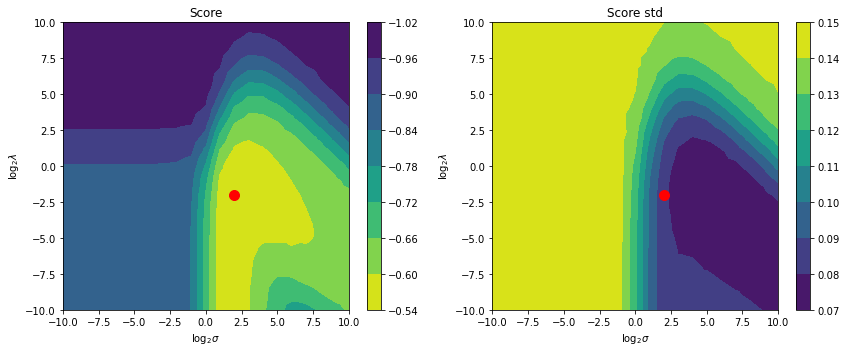

In [31]:
scores = cv_laplacian.cv_results_['mean_test_score']
scores_std = cv_laplacian.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / cv_laplacian.cv_results_['param_gamma'].data.astype(np.float64))
log_2_lambda = np.log2(cv_laplacian.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / cv_laplacian.best_params_['gamma'])
alpha_center = np.log2(cv_laplacian.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [32]:
lambdas = 2**np.linspace(-3, -1, 21)
sigmas = 2**np.linspace(1, 3, 21)

gammas = 1/sigmas

cv_laplacian = GridSearchCV(KernelRidge(kernel='laplacian'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                            scoring='neg_mean_squared_error', cv=10)
cv_laplacian.fit(X_train, Y_train)
print(cv_laplacian.best_params_)

print('best_lambda', cv_laplacian.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_laplacian.best_params_['gamma']][0])

{'alpha': 0.217637640824031, 'gamma': 0.25}
best_lambda 0.217637640824031
best_sigma 4.0


In [34]:
print(np.log2(cv_laplacian.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_laplacian.best_params_['gamma']][0]))

-2.2
2.0


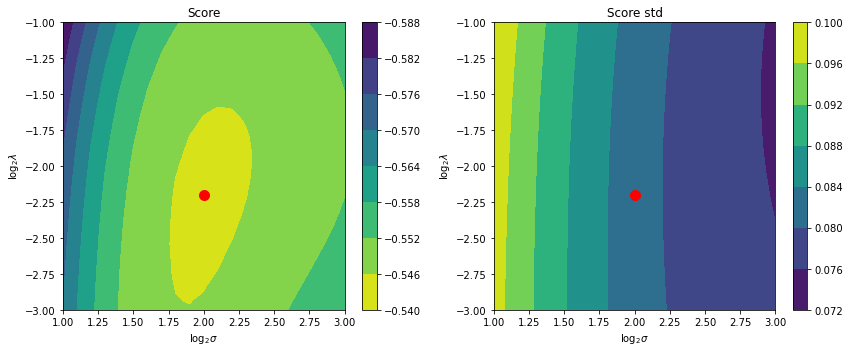

In [35]:
scores = cv_laplacian.cv_results_['mean_test_score']
scores_std = cv_laplacian.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / cv_laplacian.cv_results_['param_gamma'].data.astype(np.float64))
log_2_lambda = np.log2(cv_laplacian.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / cv_laplacian.best_params_['gamma'])
alpha_center = np.log2(cv_laplacian.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

In [36]:
lambdas = 2**np.linspace(-2.5, -2, 21)
sigmas = 2**np.linspace(1.75, 2.25, 21)

gammas = 1/sigmas

cv_laplacian = GridSearchCV(KernelRidge(kernel='laplacian'), param_grid={'alpha': lambdas, "gamma": gammas}, 
                            scoring='neg_mean_squared_error', cv=10)
cv_laplacian.fit(X_train, Y_train)
print(cv_laplacian.best_params_)

print('best_lambda', cv_laplacian.best_params_['alpha'])
print('best_sigma', sigmas[gammas == cv_laplacian.best_params_['gamma']][0])
print(np.log2(cv_laplacian.best_params_['alpha']))
print(np.log2(sigmas[gammas == cv_laplacian.best_params_['gamma']][0]))

{'alpha': 0.22144187977559018, 'gamma': 0.2457051496363128}
best_lambda 0.22144187977559018
best_sigma 4.069918768410745
-2.175
2.025


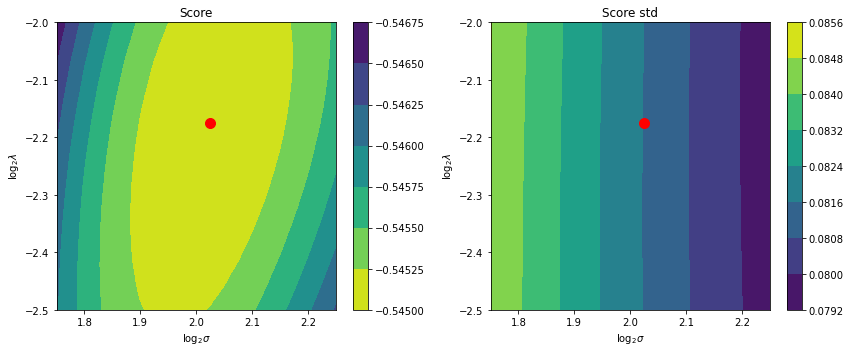

In [46]:
scores = cv_laplacian.cv_results_['mean_test_score']
scores_std = cv_laplacian.cv_results_['std_test_score']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
log_2_sigma = np.log2(1 / cv_laplacian.cv_results_['param_gamma'].data.astype(np.float64))
log_2_lambda = np.log2(cv_laplacian.cv_results_['param_alpha'].data.astype(np.float64))
sigma_center = np.log2(1 / cv_laplacian.best_params_['gamma'])
alpha_center = np.log2(cv_laplacian.best_params_['alpha'])

cm0 = ax[0].tricontourf(log_2_sigma, log_2_lambda, scores)
ax[0].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[0].set_xlabel('$\log_2\sigma$')
ax[0].set_ylabel('$\log_2\lambda$')
ax[0].set_title('Score')
fig.colorbar(cm0, ax=ax[0])

cm1 = ax[1].tricontourf(log_2_sigma, log_2_lambda, scores_std)
ax[1].plot(sigma_center, alpha_center, '.', markersize=20, color='red')
ax[1].set_xlabel('$\log_2\sigma$')
ax[1].set_ylabel('$\log_2\lambda$')
ax[1].set_title('Score std')
fig.colorbar(cm1, ax=ax[1])

fig.tight_layout()

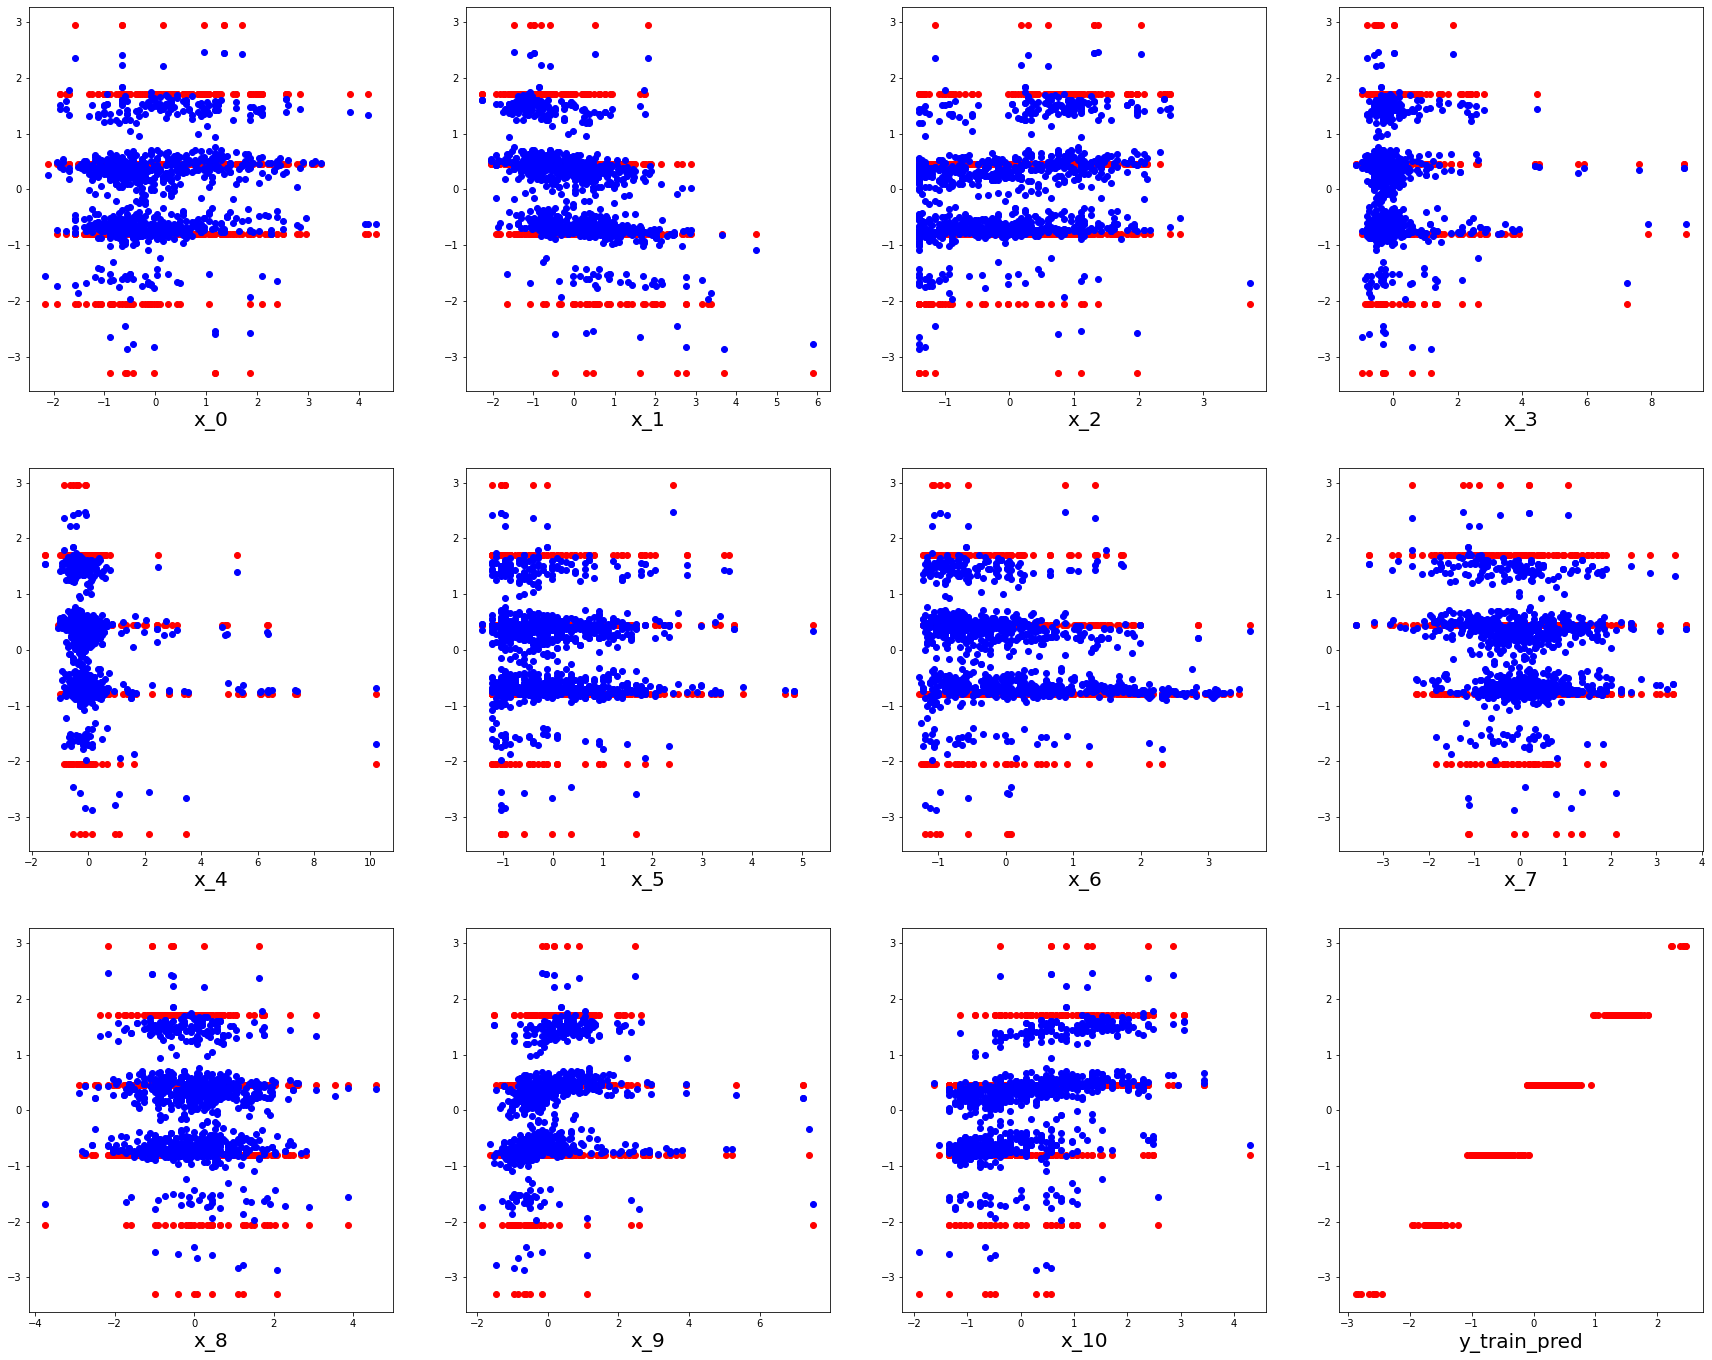

In [47]:
Y_train_pred = cv_laplacian.predict(X_train)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter(Y_train_pred, Y_train, color='r')
            ax[j][i].set_xlabel('y_train_pred', fontsize=20)
            break
        ax[j][i].scatter(X_train[:, i+j*4], Y_train, color='r', label='Train')
        ax[j][i].scatter(X_train[:, i+j*4], Y_train_pred, color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

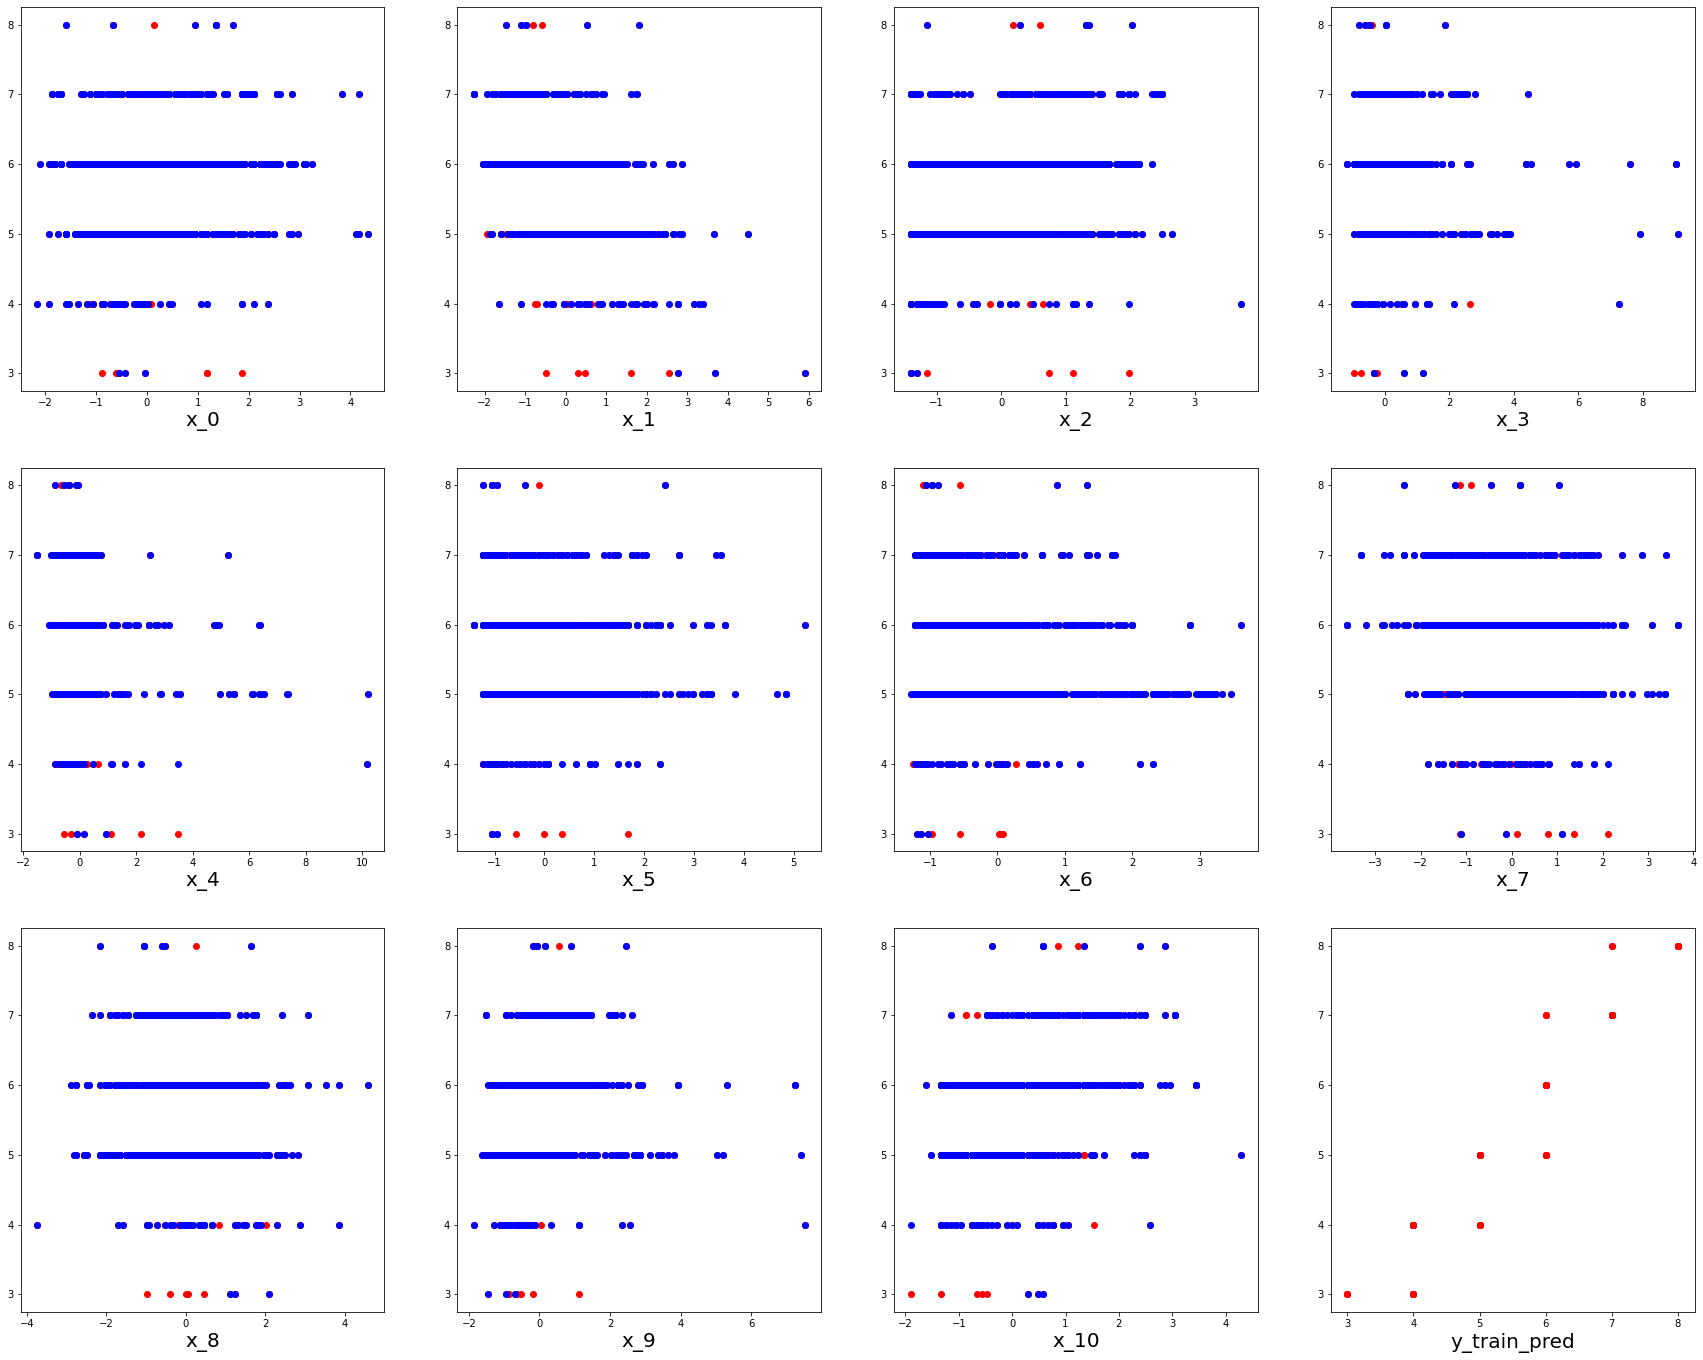

In [48]:
Y_train_pred = cv_laplacian.predict(X_train)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter((Y_train_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), 
                              Y_train*scaler.scale_[-1] + scaler.mean_[-1], color='r')
            ax[j][i].set_xlabel('y_train_pred', fontsize=20)
            break
        ax[j][i].scatter(X_train[:, i+j*4], Y_train*scaler.scale_[-1] + scaler.mean_[-1], color='r', label='Train')
        ax[j][i].scatter(X_train[:, i+j*4], (Y_train_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

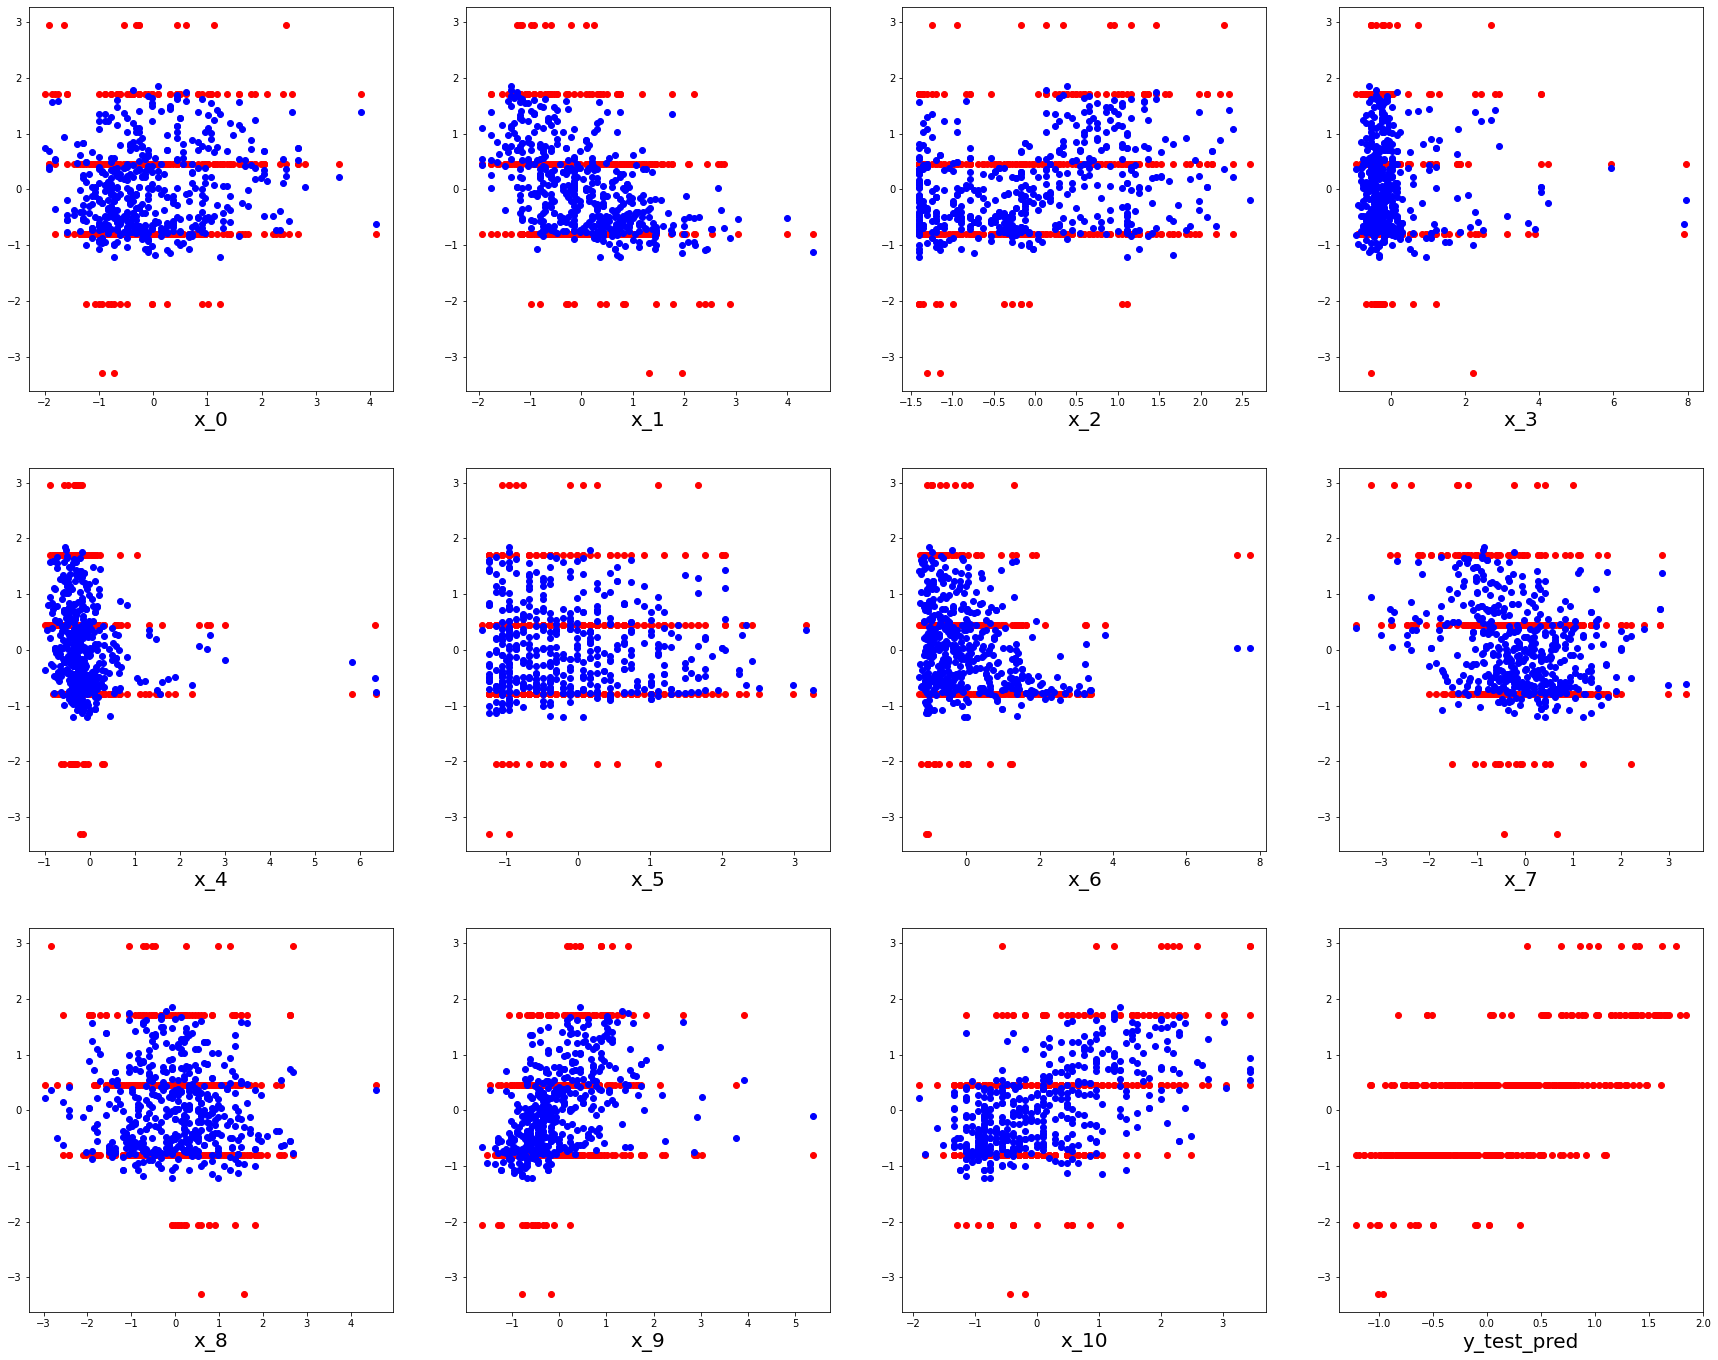

In [49]:
Y_test_pred = cv_laplacian.predict(X_test)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter(Y_test_pred, Y_test, color='r')
            ax[j][i].set_xlabel('y_test_pred', fontsize=20)
            break
        ax[j][i].scatter(X_test[:, i+j*4], Y_test, color='r', label='Test')
        ax[j][i].scatter(X_test[:, i+j*4], Y_test_pred, color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

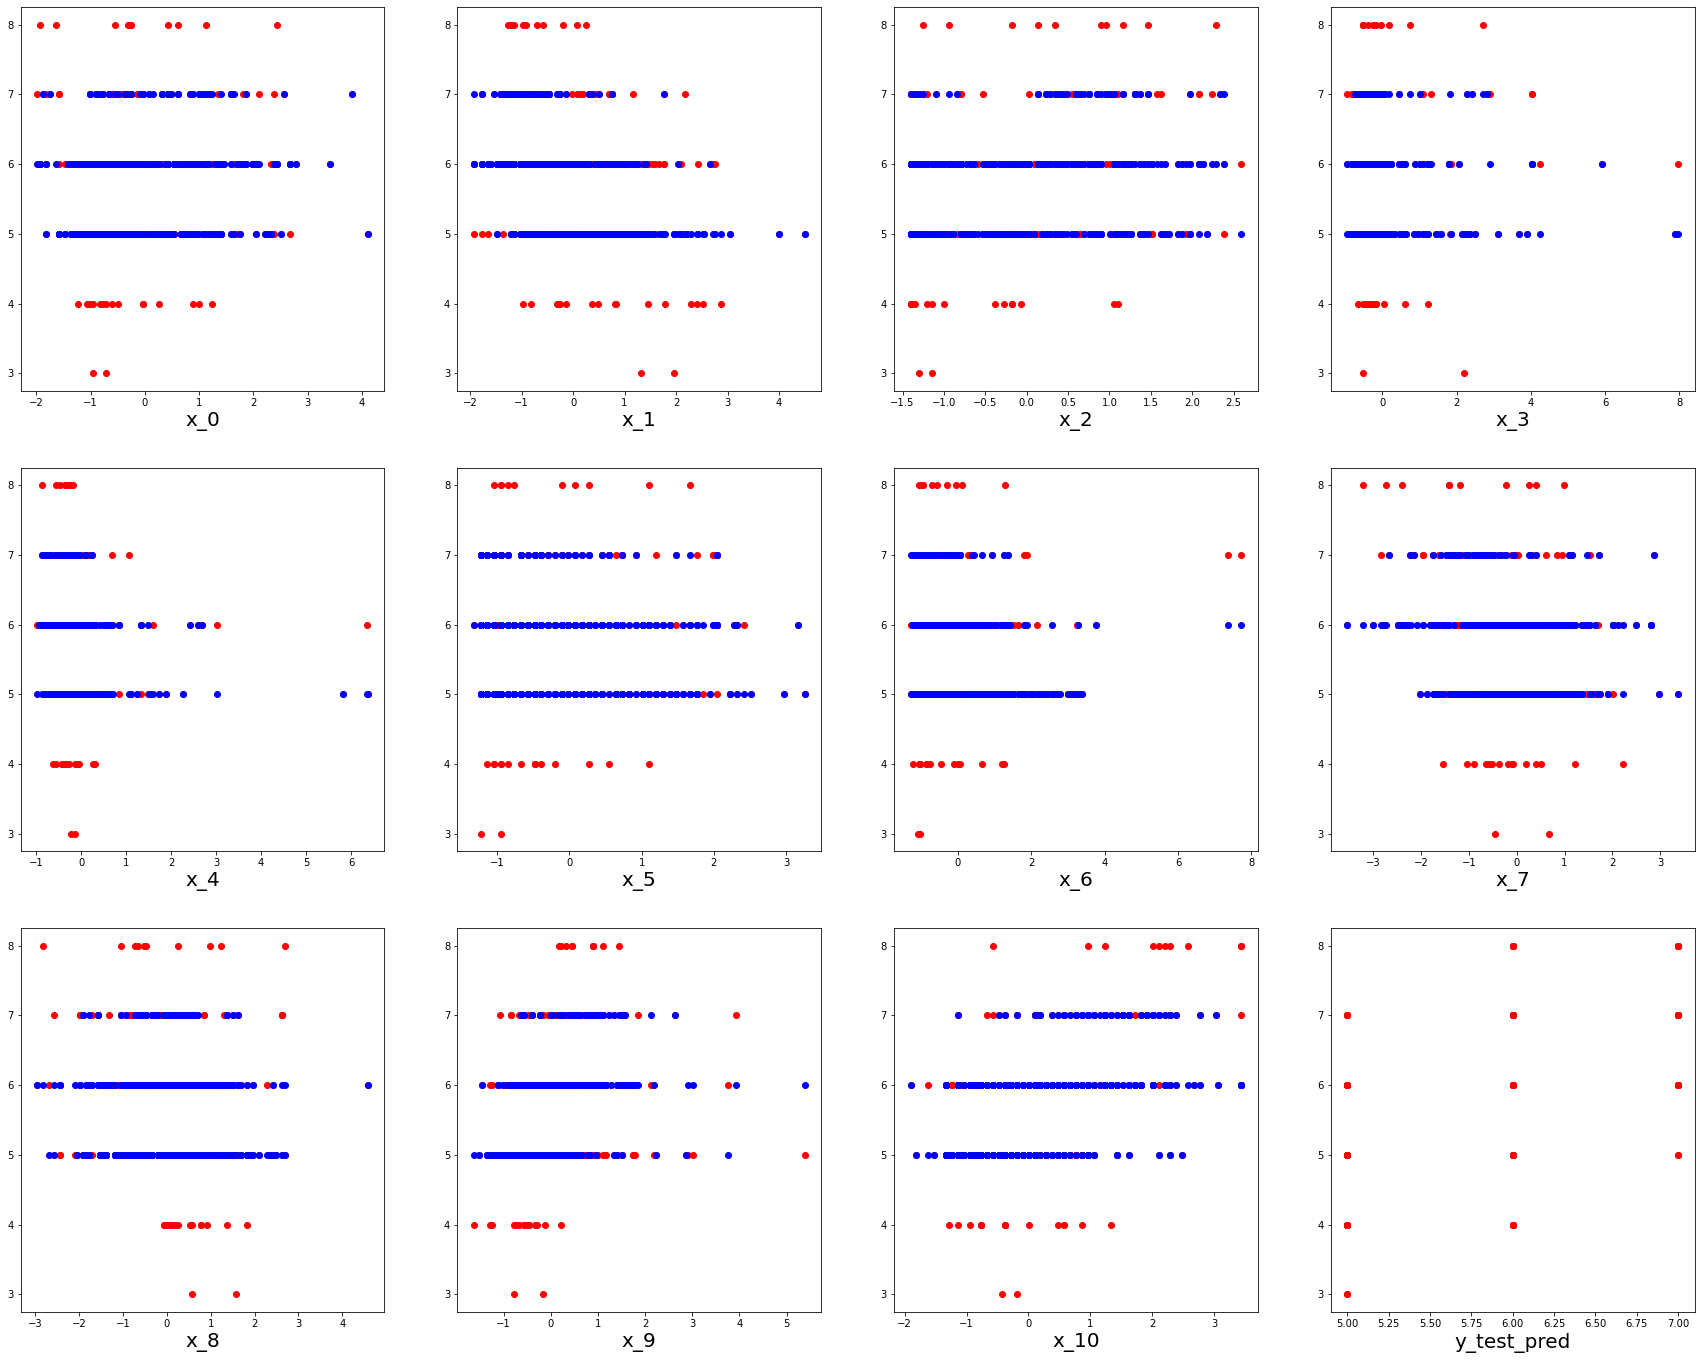

In [50]:
Y_test_pred = cv_laplacian.predict(X_test)

fig, ax = plt.subplots(3, 4, figsize=(30,24))

for j in range(3):
    for i in range(4):
        if i == 3 and j == 2:
            ax[j][i].scatter((Y_test_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), 
                              Y_test*scaler.scale_[-1] + scaler.mean_[-1], color='r')
            ax[j][i].set_xlabel('y_test_pred', fontsize=20)
            break
        ax[j][i].scatter(X_test[:, i+j*4], Y_test*scaler.scale_[-1] + scaler.mean_[-1], color='r', label='Test')
        ax[j][i].scatter(X_test[:, i+j*4], (Y_test_pred*scaler.scale_[-1] + scaler.mean_[-1]).round(), color='b', label='Prediction')
        ax[j][i].set_xlabel('x_'+str(i+j*4), fontsize=20)

In [51]:
laplacian_train_mse = mean_squared_error(Y_train, Y_train_pred)
laplacian_test_mse = mean_squared_error(Y_test, Y_test_pred)

print(laplacian_train_mse, laplacian_test_mse)

0.05086498306536009 0.6067950903037753


# New batch predict

In [55]:
scaler_new = preprocessing.StandardScaler().fit(train[:, :-1])
X_new_batch = scaler_new.transform(new_batch)

lin_new_batch_pred = lin.predict(X_new_batch)
rbf_new_batch_pred = cv_rbf.predict(X_new_batch)
laplacian_new_batch_pred = cv_laplacian.predict(X_new_batch)

In [56]:
lin_new_batch_unscaled = lin_new_batch_pred*scaler.scale_[-1] + scaler.mean_[-1]
rbf_new_batch_unscaled = rbf_new_batch_pred*scaler.scale_[-1] + scaler.mean_[-1]
laplacian_new_batch_unscaled = laplacian_new_batch_pred*scaler.scale_[-1] + scaler.mean_[-1]

print(lin_new_batch_unscaled, lin_new_batch_unscaled.round())
print(rbf_new_batch_unscaled, rbf_new_batch_unscaled.round())
print(laplacian_new_batch_unscaled, laplacian_new_batch_unscaled.round())

[6.00469789 5.28767761 5.56363072 6.067022   5.94248207] [6. 5. 6. 6. 6.]
[5.97810847 5.44072286 5.33280072 6.11517657 6.04015304] [6. 5. 5. 6. 6.]
[6.03508511 5.48684335 5.62196596 5.95552636 5.99181821] [6. 5. 6. 6. 6.]
